# **ANN Script**

In [1]:
import numpy
# spicy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external widow.
%matplotlib inline

In [2]:
# Artificial Neural Network Class definition
class neuralNetwork:

    # initialise the neural network (with these parameters)
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):

        # set the number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weights matrices, Wih & Who
        # weights inside the arrays are w_i_j, where the link is from 
        # node i to node j in the next layer
        # W11 -> W21
        # W12 -> W22, etc.

        # weights from input to hidden layer
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        # weights from hidden to output layer
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # set the learning rate
        self.lr = learningrate

        # Activation function / Sigmoid - using scipy.special (library/ module) 
        self.activation_function = lambda x: scipy.special.expit(x)

        pass

    # train the neural network
    def train(self, inputs_list, target_list):

        # Converts inputs lists into a 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T

        # Calculate signals that I'll pass into the activation 
        # function in the hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Calculate the signal emergin from the hidden layer 
        hidden_outputs = self.activation_function(hidden_inputs)

        # Calculate signals that I'll pass into the activation 
        # function in the final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Calculate the signals emergin fron the output layer / The Final Output
        final_outputs = self.activation_function(final_inputs)

        # Calculate the error wich is (target - actual)
        output_errors = targets - final_outputs 

        # Hidden layer error
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # Update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors *  final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # Update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    # query the neural network 
    # give an answer from the output nodes after being given an input
    def query(self, inputs_list):

        # Convert input list into a 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        #  Calculate signals into hidden layer (input * weights)
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Calculate the signals emerging from the hidden layers
        hidden_outputs = self.activation_function(hidden_inputs)

        # Calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

**Training**

In [3]:
# number of input, hidden and output nodes 
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.2

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the MNIST training data CSV file into a list
training_data_file = open("mnist_dataset\mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the ANN

# go through all records in the training data set
for record in training_data_list:

    # split the record by the ',' commas
    all_values = record.split(",")

    # scale and shift the inputs
    # Dividing the raw inputs which are in the range 0-255 by 255 bring them into the
    # range 0-1. We then need to multiply by 0.99 too bring them into the range 0.0-0.99.
    # We then add 0.01 to shift them up the desire range 0.01 to 1.00.
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # create the target output values (all 0.01, except the desired label wich is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

**Testing the ANN**

In [4]:
# load the MNIST dataset CSV file into a list 
test_data_file = open("mnist_dataset\mnist_test.csv", "r")
# .readlines() - Return all lines in the file, as a list where each line is an item in the list object
test_data_list = test_data_file.readlines()
test_data_file.close

<function TextIOWrapper.close()>

In [5]:
# get the 1st record
all_values = test_data_list[2].split(",")
# print the label
print(all_values[1:])


['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '38', '254', '109', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '87', '252', '82', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '135', '241', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '

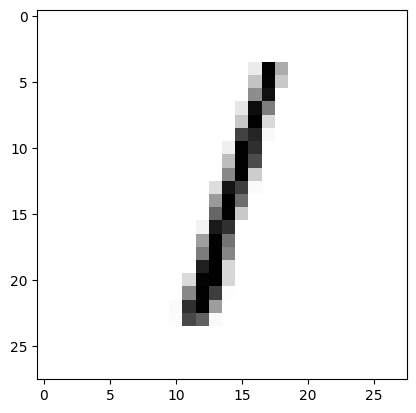

In [6]:
# Plot Array of 28*28 
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))

# Ploth
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

**Query**

In [7]:
# query

# scale and shift the inputs
# Dividing the raw inputs which are in the range 0-255 by 255 bring them into the
# range 0-1. We then need to multiply by 0.99 too bring them into the range 0.0-0.99.
# We then add 0.01 to shift them up the desire range 0.01 to 1.00.

n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 )

array([[5.25817022e-04],
       [9.87608911e-01],
       [3.54781922e-03],
       [4.07679846e-03],
       [2.96550144e-02],
       [1.61340178e-02],
       [8.63000128e-03],
       [4.62724497e-03],
       [2.00546568e-03],
       [1.81449339e-03]])

**Test the whole test dataset**

In [8]:
# Test the ANN

# Scorecard for how well the network performs, initially empty 
scorecard = []

# Go through all the records in the test dataset
for record in test_data_list:

    all_values = record.split(",")

    correct_label = int(all_values[0])
    print(correct_label, "correct label")

    # Scale the inputs 
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # Query the ANN 
    outputs = n.query(inputs)

    # The index of the highest value correspond to the label
    label = numpy.argmax(outputs)
    print(label, "ANN answer")

    # append correct or incorrect to list
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

7 correct label
7 ANN answer
2 correct label
2 ANN answer
1 correct label
1 ANN answer
0 correct label
0 ANN answer
4 correct label
4 ANN answer
1 correct label
1 ANN answer
4 correct label
4 ANN answer
9 correct label
9 ANN answer
5 correct label
6 ANN answer
9 correct label
9 ANN answer
0 correct label
0 ANN answer
6 correct label
6 ANN answer
9 correct label
9 ANN answer
0 correct label
0 ANN answer
1 correct label
1 ANN answer
5 correct label
5 ANN answer
9 correct label
9 ANN answer
7 correct label
7 ANN answer
3 correct label
3 ANN answer
4 correct label
4 ANN answer
9 correct label
9 ANN answer
6 correct label
6 ANN answer
6 correct label
6 ANN answer
5 correct label
5 ANN answer
4 correct label
4 ANN answer
0 correct label
0 ANN answer
7 correct label
7 ANN answer
4 correct label
4 ANN answer
0 correct label
0 ANN answer
1 correct label
1 ANN answer
3 correct label
3 ANN answer
1 correct label
1 ANN answer
3 correct label
3 ANN answer
4 correct label
0 ANN answer
7 correct labe

In [9]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
# Calculate accuracy
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9465


**Training with epocs**

In [11]:
# Repeat the training several times against the dataset, each run is called an epoc

In [12]:
# number of input, hidden and output nodes 
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.2

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the MNIST training data CSV file into a list
training_data_file = open("mnist_dataset\mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the ANN with epocs 
EPOCS = 2

for e in range(EPOCS):
    # go through all records in the training data set
    for record in training_data_list:

        # split the record by the ',' commas
        all_values = record.split(",")

        # scale and shift the inputs
        # Dividing the raw inputs which are in the range 0-255 by 255 bring them into the
        # range 0-1. We then need to multiply by 0.99 too bring them into the range 0.0-0.99.
        # We then add 0.01 to shift them up the desire range 0.01 to 1.00.
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        # create the target output values (all 0.01, except the desired label wich is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [13]:
# load the MNIST dataset CSV file into a list 
test_data_file = open("mnist_dataset\mnist_test.csv", "r")
# .readlines() - Return all lines in the file, as a list where each line is an item in the list object
test_data_list = test_data_file.readlines()
test_data_file.close

<function TextIOWrapper.close()>

In [14]:
# Test the ANN / without showing results 

# Scorecard for how well the network performs, initially empty 
scorecard = []

# Go through all the records in the test dataset
for record in test_data_list:

    all_values = record.split(",")

    correct_label = int(all_values[0])

    # Query the ANN 
    outputs = n.query(((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01))

    # The index of the highest value correspond to the label
    label = numpy.argmax(outputs)

    # append correct or incorrect to list
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

In [15]:
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9577


# **NOTES**

In [16]:
# NOTE
# About creating random weights:
# The sophisticated approach to creating the initial random weights, is to sample 
# the weights from a normal probability distribution centred around zero and with
# a standard deviation that is related to the number of incoming links into a node
# Example --> 1/sqrt(number of incoming links)
# 
# lambda:
# it's a way of creating a function 
# find obout it in (Built-in-functions).
#
# .T at the end of a NumPy Array:
# Significa que lo convierte en su transpuesta.

# **Testing Code**

In [17]:
# number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate = 0.3
learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [18]:
# using the query method of the ANN class
n.query([1, 1.5, 1.3])

array([[0.36066676],
       [0.50629105],
       [0.47245593]])

**Learning How to use NumPy**

In [19]:
a = numpy.random.rand(3, 3) - 0.5

In [20]:
a

array([[ 0.08037119,  0.47665929, -0.40988139],
       [ 0.21905064, -0.12082345, -0.12481267],
       [-0.00487368, -0.39436189, -0.44030041]])

In [21]:
# La transpuesta del Array(a)
a.T

array([[ 0.08037119,  0.21905064, -0.00487368],
       [ 0.47665929, -0.12082345, -0.39436189],
       [-0.40988139, -0.12481267, -0.44030041]])

In [22]:
a.transpose

<function ndarray.transpose>

In [23]:
# Convert a list into a Numpy Array
b = [[1, 2],[3, 4]]
b = numpy.array(b)
b

array([[1, 2],
       [3, 4]])

In [24]:
b.T

array([[1, 3],
       [2, 4]])